In [104]:
library(tidyverse)

In [105]:
apartments<- read_csv2("data/apartments_for_rent_classified_10K.csv")
head(apartments)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 10000 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (18): category, title, body, amenities, bathrooms, bedrooms, currency, f...
dbl  (4): id, price, square_feet, time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,⋯,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE, Washington, DC 20002","This unit is located at second St NE, Uhland Terrace NE, Washington, DC 20002, Washington, 20002, DCMonthly rental rates range from $790 - $1090We have studio units available for rent",null,null,0,USD,No,Thumbnail,⋯,$790,Monthly,101,null,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evansville, 47712, INMonthly rental rates range from $425 - $445We have studio - 1 beds units available for rent",null,null,1,USD,No,Thumbnail,⋯,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arlington, VA 22209","This unit is located at N Scott St, 14th St N, Arlington, VA 22209, Arlington, 22209, VAMonthly rental rates range from $1390We have studio units available for rent",null,1,0,USD,No,Thumbnail,⋯,"$1,390",Monthly,107,null,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle, 98122, WAMonthly rental rates range from $925We have studio units available for rent",null,1,0,USD,No,Thumbnail,⋯,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland St, Arlington","This unit is located at Washington Blvd, N Cleveland St, Arlington, Arlington, 22201, VAMonthly rental rates range from $880We have studio units available for rent",null,null,0,USD,No,Thumbnail,⋯,$880,Monthly,125,null,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401
5667891676,housing/rent/apartment,0 BR in New York NY 10019,"**RARE GEM WITH PRIVATE OUTDOOR TERRACE****AVAILABLE IMMEDIATELY** $2475 RENT IS NET EFFECTIVE WITH one month FREE ON $2700 Monthly rent***Low Fee*UNFURNISHED Spacious and Sunny Southern facing studio (403 sq-ft) with big private terrace (130 sq. feet) basks in natural sunlight all day long, facing the scenic landscaped and peaceful residents ct. yard. The apartment features hard wood floors throughout, a carousel kitchen with new appliances and two big closets. Laundry on floor steps away.Worldwide Plaza is a full-service condo that pampers its residents with concierge and 24-hr attendant at door services, a live-in resident manager, a scenic landscaped court yard and lounge, valet service, 8 laundry rooms (washer and dryers are permitted within the residences), on-site garage and a separate full-service health club (NYSC ELITE) equipped with a 25 meter salt water pool, immersive VR spin cycling room, sauna, steam room, etc.","Dishwasher,Elevator,Patio/Deck,Pool,Storage",1,0,USD,No,Thumbnail,⋯,"$2,475",Monthly,130,350 West 50th St,Manhattan,NY,40.7629,-73.9885,Listanza,1577289784


This is our dataset. From here, we can see that there are alot of unnecessary variable that does not contribute directly into our analysis, therefore we must address them and filter them out. Next, we would like to only filter for the column "price_type" and only choose rows where the type is "Monthly".

In [106]:
apt_read <- apartments|>
            group_by(price_type)|>
            summarize(count =n())

apt_read

price_type,count
<chr>,<int>
Monthly,9998
Monthly|Weekly,1
Weekly,1


In [119]:
apt_read <- apartments|>
            group_by(source)|>
            summarize(count =n())

apt_wrangled <- apartments |>
                filter(bathrooms != 'null')|>
                filter(bedrooms != 'null')|>
                filter(price_type == "Monthly")|>
                mutate(bathrooms = as.double(bathrooms))|>
                mutate(bedrooms = as.double(bedrooms))|>
                mutate(category = as.factor(category))|>
                mutate(category = fct_recode(category,
                                            'Apartment' = 'housing/rent/apartment',
                                            'Home' = 'housing/rent/home',
                                            'Short Term' = 'housing/rent/short_term'))|>
                mutate(time = as.POSIXct(time, origin="1970-01-01"))|>
                select(-latitude,- longitude, -pets_allowed, -price_display, -address, -title, -body, -fee, -has_photo)


              


apt_states <-  apt_sample |>
            group_by (state)|>
            summarize(count = n())|>
            arrange(desc(count))

apt_texas_austin <- apt_wrangled |>
                    filter(cityname == "Austin" & state == "TX")


glimpse(apt_texas_austin)
glimpse(apt_states)

Rows: 522
Columns: 13
$ id          <dbl> 5668622362, 5664597909, 5668632154, 5668629766, 5664594444…
$ category    <fct> Apartment, Apartment, Apartment, Apartment, Apartment, Apa…
$ amenities   <chr> "Pool", "null", "null", "null", "null", "null", "null", "n…
$ bathrooms   <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ bedrooms    <dbl> 1, 0, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 0, 2, 1, 2, 2, 2, 1, 2…
$ currency    <chr> "USD", "USD", "USD", "USD", "USD", "USD", "USD", "USD", "U…
$ price       <dbl> 700, 900, 1386, 809, 875, 1246, 850, 950, 940, 929, 999, 9…
$ price_type  <chr> "Monthly", "Monthly", "Monthly", "Monthly", "Monthly", "Mo…
$ square_feet <dbl> 250, 300, 334, 337, 350, 352, 360, 362, 375, 378, 391, 391…
$ cityname    <chr> "Austin", "Austin", "Austin", "Austin", "Austin", "Austin"…
$ state       <chr> "TX", "TX", "TX", "TX", "TX", "TX", "TX", "TX", "TX", "TX"…
$ source      <chr> "RentLingo", "RentLingo", "RentLingo", "RentLingo", "RentL…
$ time        <dtt

From here we see that Texas has the highest count of rental properties

In [120]:
set.seed(2) 
#DO NOT REMOVE THE ABOVE!
apt_split <- initial_split(apt_texas_austin, prop = 0.75, strata = price)  
apt_train <- training(apt_split)   
apt_test <- testing(apt_split)

glimpse(apt_train)

Rows: 391
Columns: 13
$ id          <dbl> 5668622362, 5664597909, 5668629766, 5668633130, 5668630075…
$ category    <fct> Apartment, Apartment, Apartment, Apartment, Apartment, Apa…
$ amenities   <chr> "Pool", "null", "null", "null", "Dishwasher,Parking,Pool",…
$ bathrooms   <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ bedrooms    <dbl> 1, 0, 2, 2, 2, 0, 2, 3, 1, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2, 1…
$ currency    <chr> "USD", "USD", "USD", "USD", "USD", "USD", "USD", "USD", "U…
$ price       <dbl> 700, 900, 809, 850, 940, 919, 875, 900, 900, 895, 895, 895…
$ price_type  <chr> "Monthly", "Monthly", "Monthly", "Monthly", "Monthly", "Mo…
$ square_feet <dbl> 250, 300, 337, 360, 375, 394, 398, 400, 400, 400, 400, 400…
$ cityname    <chr> "Austin", "Austin", "Austin", "Austin", "Austin", "Austin"…
$ state       <chr> "TX", "TX", "TX", "TX", "TX", "TX", "TX", "TX", "TX", "TX"…
$ source      <chr> "RentLingo", "RentLingo", "RentLingo", "RentLingo", "RentL…
$ time        <dtt

In [121]:
summary_table <- apt_train |>
  group_by(source) |>
  summarize(
    num_observations = n(),
    mean_bathrooms = mean(bathrooms, na.rm = TRUE),
    mean_bedrooms = mean(bedrooms, na.rm = TRUE),
    mean_square_feet = mean(square_feet, na.rm = TRUE),
    mean_price = mean(price, na.rm = TRUE))
  
summary_table

source,num_observations,mean_bathrooms,mean_bedrooms,mean_square_feet,mean_price
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
RentDigs.com,1,1.000000,1.000000,792.0000,944.000
RentLingo,390,1.061538,1.246154,637.0872,1197.221


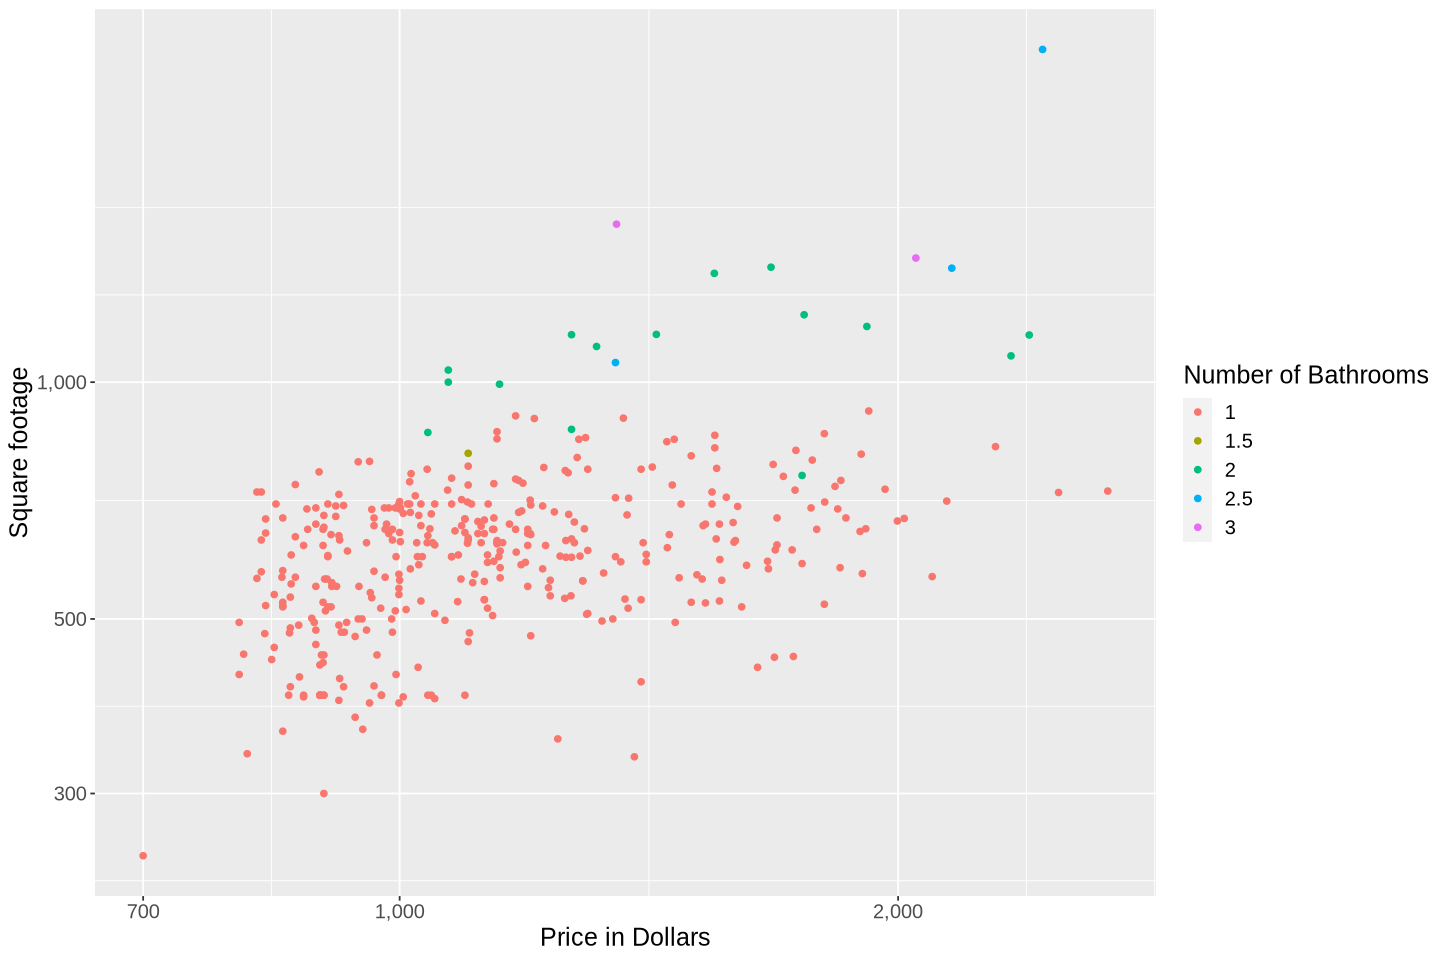

In [122]:
options(repr.plot.width = 12, repr.plot.height = 8) 
price_vs_area <- apt_train |>
                ggplot(aes(x = price, y = square_feet))+
                geom_point(aes(color = as_factor(bathrooms)))+
                labs(x = "Price in Dollars", y = "Square footage", color = "Number of Bathrooms") +
                scale_x_log10(labels = label_comma()) +
                scale_y_log10(labels = label_comma())+
                theme(text = element_text(size = 15))

price_vs_area


Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 4 rows containing missing values (`geom_bar()`).”


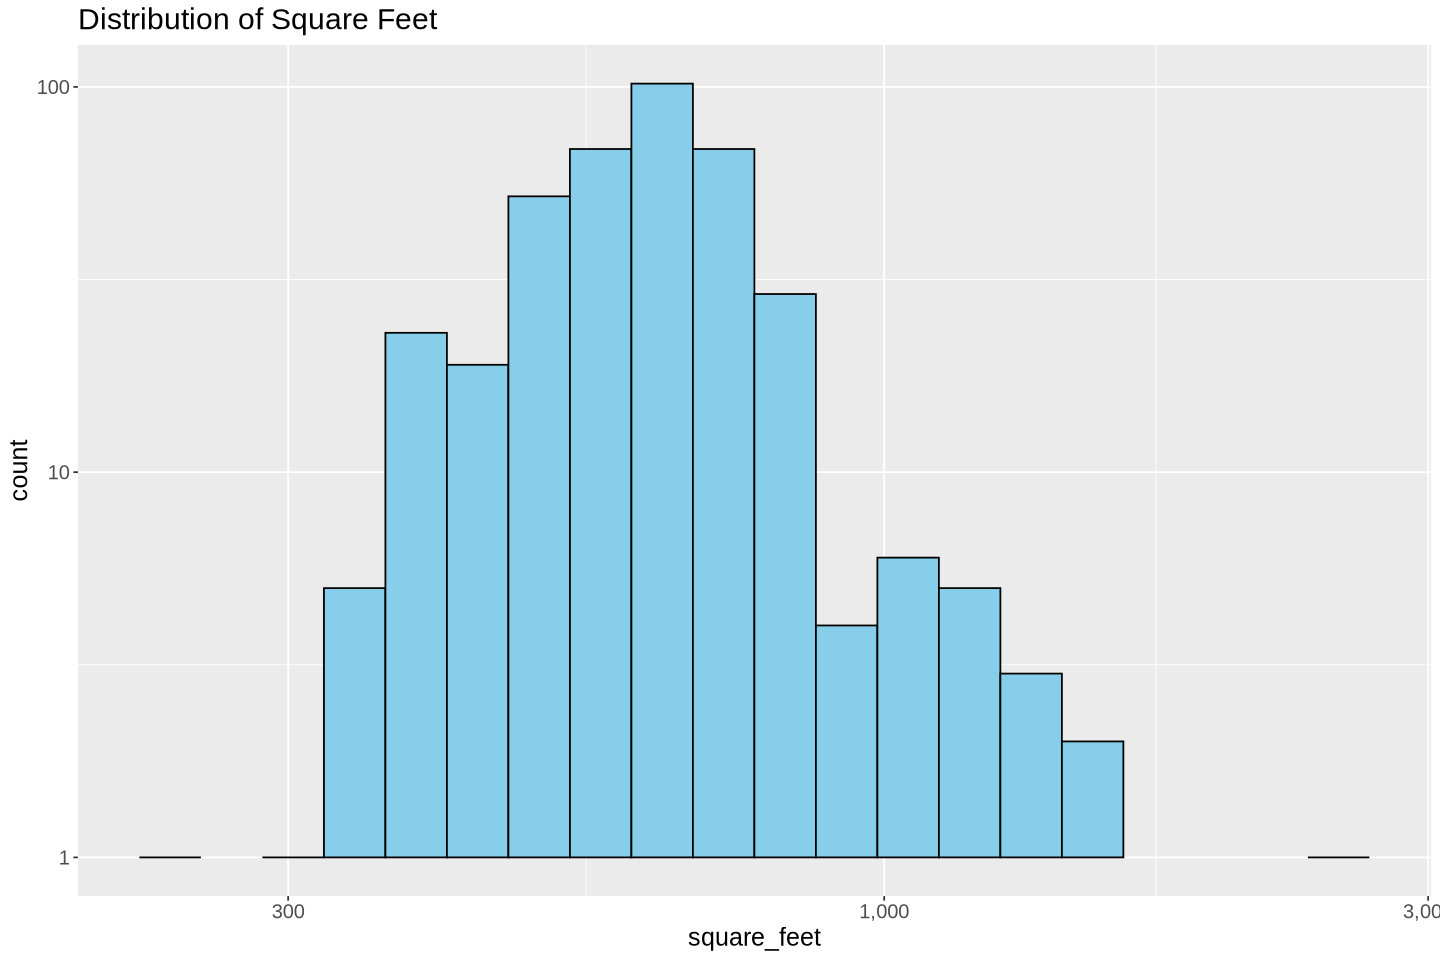

In [123]:
square_footage_dist <- ggplot(data = apt_train) +
  geom_histogram(mapping = aes(x = square_feet), bins = 20, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Square Feet")+
     scale_x_log10(labels = label_comma()) +
                scale_y_log10(labels = label_comma())+
                theme(text = element_text(size = 15))


square_footage_dist